# Foundations of Data Mining: Assignment 3


Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

 **Deadline:** Thursday, March 29,  2018

In [1]:
%matplotlib inline
from preamble import *

import sklearn.decomposition as deco
import sklearn.manifold as manifold

plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
# InteractiveShell.ast_node_interactivity = "all" 

from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns

## PCA and Isomap (5 Points, 1+2+2)

Apply PCA and Isomap to images of handwritten digits (see below). You may use sklearn.decomposition and sklearn.manifold.

In [2]:
# Load the data set
from sklearn import datasets
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
N=len(X)

# Align a data set with a reference data set minimizing l_1 error
# Returns aligned data set and alignment error
def align(ref_data, data):
    
    transformations = np.asarray([
        [[0,1],[1,0]], 
        [[0,-1],[1,0]], 
        [[0,1],[-1,0]], 
        [[0,-1],[-1,0]], 
        [[1,0],[0,1]], 
        [[1,0],[0,-1]], 
        [[-1,0],[0,1]], 
        [[-1,0],[0,-1]] 
    ])
    
    score = []
    for i in range(0,8):
        transf_data =   np.matmul(data, transformations[i])
        score.append(np.linalg.norm( transf_data - ref_data, ord=1) )
        
    idx = np.argmin(score)
    transf_data = np.matmul(data,transformations[idx])
    
    print("Aligned the data sets. Score is {0:10.1f}  ".format(score[idx]))
    
    return transf_data, score[idx]


### a)  
Compute the first two components of the data using PCA. Make a scatter plot of the data in the first two components of PCA indicating class with color.

In [3]:
pca = PCA(2)  # We project from 64 dimensions (pixels) to 2 dimensions
pca_projected = pca.fit_transform(digits.data)   #we fit and transform
print(digits.data.shape)
print(pca_projected.shape)
print("As we can see we go from 64 dimensions to 2")

(1797, 64)
(1797, 2)
As we can see we go from 64 dimensions to 2


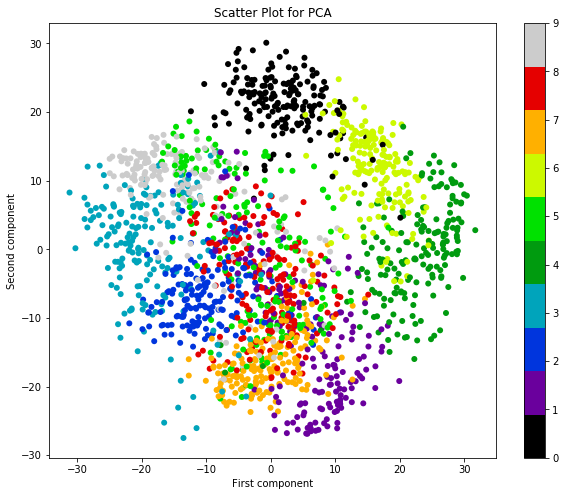

In [28]:
plt.figure(figsize = (10, 8))
plt.scatter(pca_projected[:, 0], pca_projected[:, 1],
            c = digits.target, edgecolor='none',
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title("Scatter Plot for PCA")
plt.colorbar();

In [11]:
print("Here we show the first 2 computed components:")
print(pca.components_)

Here we show the first 2 computed components:
[[ 0.    -0.017 -0.223 -0.136 -0.033 -0.097 -0.008  0.002 -0.    -0.119
  -0.244  0.149 -0.047 -0.218 -0.015  0.004 -0.    -0.08   0.083  0.216
  -0.172 -0.164  0.029  0.004  0.     0.064  0.254 -0.036 -0.209 -0.043
   0.051  0.    -0.     0.16   0.369  0.164  0.085  0.037  0.022 -0.
   0.001  0.107  0.303  0.248  0.21   0.012 -0.037  0.002  0.001 -0.008
  -0.056  0.093  0.107 -0.138 -0.063  0.001  0.    -0.014 -0.236 -0.141
  -0.009 -0.089 -0.037 -0.011]
 [ 0.    -0.01  -0.049 -0.009 -0.054 -0.118 -0.062 -0.008 -0.    -0.021
   0.06  -0.005 -0.092 -0.052 -0.059 -0.003 -0.     0.036  0.198 -0.049
  -0.226 -0.005  0.027 -0.    -0.     0.077  0.188 -0.138 -0.261  0.05
   0.065  0.    -0.     0.088  0.087 -0.271 -0.285  0.166  0.128 -0.
   0.     0.051  0.13  -0.269 -0.302  0.24   0.218  0.001  0.     0.011
   0.153 -0.12  -0.097  0.286  0.149  0.001 -0.    -0.01  -0.07   0.017
   0.194  0.177  0.019 -0.007]]


### b)
 Compute an Isomap embedding with two components with nr_neighbors={5, 50, N-1} (three separate embeddings).
 For each of the Isomap embeddings, apply the function "align" (see below) with "ref_data" as your computed pca embedding and "data" as the isomap embedding. Show a scatter plot of each of the aligned isomap embeddings.

In [12]:
from sklearn import manifold, datasets
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

t0 = time()
projected_isomap = manifold.Isomap(n_neighbors=5, n_components=2).fit_transform(X)
projected_isomap.shape


(1797, 2)

In [13]:
print("Again we show the first 2 components for isomap just for comparison:")
projected_isomap

Again we show the first 2 components for isomap just for comparison:


array([[-167.272,   22.185],
       [  48.715,   51.308],
       [ 100.72 ,   25.821],
       ...,
       [  51.436,  -23.294],
       [   0.221,  -73.328],
       [  11.366,  -36.237]])

Aligned the data sets. Score is   102234.2  
Aligned the data sets. Score is    31067.5  
Aligned the data sets. Score is        0.0  


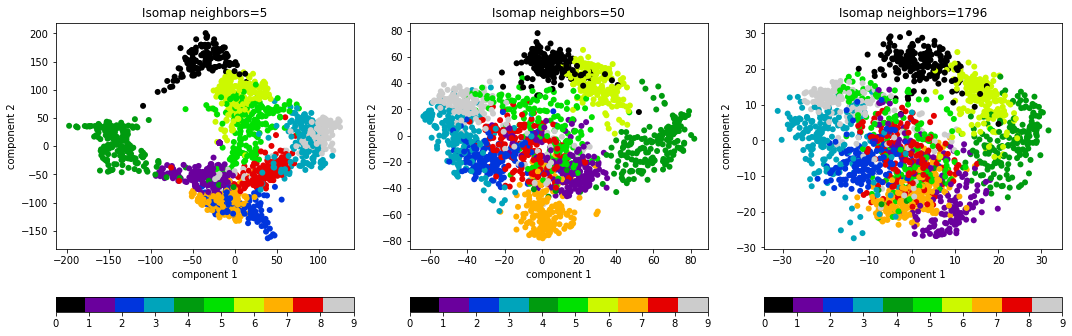

In [26]:
# Make the 3 plots in a for loop

fig, axes = plt.subplots(nrows = 1, ncols=3)
fig.set_size_inches(15, 5)
for n, axis in zip([5, 50, N - 1], axes):
    projected_isomap = manifold.Isomap(n_neighbors = n, n_components = 2).fit_transform(X)
    align_data = align(pca_projected,projected_isomap)
    data_Scatter=align_data[0]
    sc = axis.scatter(data_Scatter[:, 0], data_Scatter[:, 1],
            c=digits.target, edgecolor='none',
            cmap=plt.cm.get_cmap('spectral', 10))
    ax = axis.set_xlabel('component 1')
    ax = axis.set_ylabel('component 2')
    ax = axis.set_title("Isomap neighbors={}".format(n))
    ax = fig.colorbar(sc, ax = axis, orientation='horizontal')
    fig.tight_layout()

### c)
Visually compare how well the classes are separated in the different scatter plots. What is the effect of changing the number of neighbors on the score computed in the alignment function? What does it mean if the score is zero? When do you expect the score to become zero and why?

**Solution**

As we can see in the scatter plots above the classes are better separated in the case of 5 neighbours of isomap, while they seem to "overlap" more for PCA and higher neighbours 
for Isomap. In fact the bigger the number of neighbours we supply isomap with the more  it is starting to "behave" like pca since the plots look more and more simillar. Especially in the 
case of N-1 neighbours we see that pca and isomap give the same scatter plot for the 10 classes. This also  translates to the score computed in the alignment function. The score basically measures the difference between the projected Isomap and PCA data, so when the 2 techniques behave the same (in the case of N-1 nighbours) we expect a score of 0, which is actually the case in this example. On the other hand for neighbours = 5 where isomap "separates" the classes better the score computed is the highest since there is a big difference for the 2 algorithms. 

## Classical Multidimensional Scaling (6 Points, 1+2+2+1)

Show that for mean-centered data sets we can recover inner products using
pairwise distance information only. This is used by the isomap embedding algorithm.

We are given all squared pairwise distances of an otherwise unknown
point set ${\bf p}_1,\dots, {\bf p}_n \in \mathbb{R}^d$, i.e., we are given 
for all $1 \leq i,j \leq n$ the values

$$  d_{ij} = \|{\bf p}_i - {\bf p}_j\|^2. $$

We assume that the point set is mean-centered, that is 

$$ \sum_{i=1}^{n} {\bf p}_i = \vec{{\bf 0}}.$$

(where $\vec{{\bf 0}}$ is the vector of zeros)


In the following, $\langle {\bf p}_i , {\bf p}_j \rangle$ denotes the inner 
product of ${\bf p}_i$ and ${\bf p}_j$. 
Prove that the following holds true for mean-centered point sets: 

$$-2 \langle {\bf p}_i , {\bf p}_j \rangle = 
d_{ij}
- \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n}   
-  \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} 
+ \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{n^2} 
$$

You may use the following steps in your derivation.

### a) 
Expand  $d_{ij}$ to yield an expression of $\langle {\bf p}_i, {\bf p}_j \rangle$, $\|{\bf p}_i\|^2$ and $\|{\bf p}_j\|^2$.

#### Solution
$$
\begin{equation} 
  \begin{aligned}
    d_{ij} & =  \|{\bf p}_i - {\bf p}_j\|^2  = \sum_{m=1}^{d} (p_{im} - p_{jm})^{2} \\
    	  & = \sum_{m=1}^{d}( {p_{im}}^{2} - 2 \cdot p_{im} \cdot p_{jm} + {p_{jm}}^{2} ) \\
          & = \sum_{m=1}^{d} {p_{im}}^{2} - 2 \sum_{m=1}^{d} p_{im} \cdot p_{jm} + \sum_{m=1}^{d} {p_{jm}}^{2}  \\
          & = \|{\bf p}_i\|^{2} -2 \langle {\bf p}_{i}, {\bf p}_{j} \rangle + \|{\bf p}_{j}\|^{2}
  \end{aligned} 
\end{equation}
$$


### b) 
Show that the following holds for any $ {\bf q} \in \mathbb{R}^d$:
$$ \sum_{1 \leq i \leq n} \langle {\bf p}_i , {\bf q} \rangle =   0$$

#### Solution
$$
\begin{equation} 
  \begin{aligned}
	\sum_{i=1}^{n} \langle {\bf p}_i , {\bf q} \rangle & = \sum_{i=1}^{n} \sum_{m=1}^{d} (p_{im} \cdot q_{m}) = \sum_{m=1}^{d} \left( q_{m} \cdot \sum_{i=1}^{n} p_{im} \right)\\
        & = \langle {\bf q} , \sum_{i=1}^{n} \bf{p}_{i} \rangle = \langle {\bf q} , \vec{\bf{0}} \rangle = \vec{\bf{0}}
  \end{aligned} 
\end{equation}
$$

We used the assumption that the point set is mean-centered.

### c) 
Prove that 
$$\|{\bf p}_i\|^2 = \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}$$

#### Solution

We start analyzing the sum of all distances and we use the result derived in **b)**

$$
\begin{equation} 
  \begin{aligned}
  	\sum_{\ell=1}^{n} d_{i\ell} & = \sum_{\ell=1}^{n} \|{\bf p}_i - {\bf p}_{\ell}\|^2 = \sum_{\ell=1}^{n} \|{\bf p}_i\|^{2} -2 \langle {\bf p}_{i}, {\bf p}_{\ell} \rangle + \|{\bf p}_{\ell}\|^{2} \\
    	& = n \cdot \|{\bf p}_i\|^{2} + \sum_{\ell=1}^{n} \|{\bf p}_{\ell}\|^{2}
  \end{aligned} 
\end{equation}
$$
Therefore,
$$
\begin{equation} 
  \begin{aligned}
  	\|{\bf p}_i\|^{2} = \frac{1}{n} \sum_{\ell=1}^{n} d_{i\ell} - \frac{1}{n} \sum_{\ell=1}^{n} \|{\bf p}_{\ell}\|^{2}
  \end{aligned} 
\end{equation}
$$
And similarly,
$$
\begin{equation} 
  \begin{aligned}
  	\frac{1}{n} \sum_{\ell=1}^{n} \|{\bf p}_{\ell}\|^{2} &=  \frac{1}{n} \sum_{\ell=1}^{n} d_{i\ell} - \|{\bf p}_i\|^{2}
  \end{aligned}
\end{equation}
$$

These results tell us that in a space of points, we can express the module of any arbitrary point ${\bf p}_i$ in terms of its distance to all the points in the set ($d_{i\ell}$) and the sum of all the point's modules. Similarly, we can express the sum of all point's modules in terms of any arbitrary point ${\bf p}_i$ and the distances from all other points to ${\bf p}_i$. We can therefore "recursively" use this result, by taking the same arbitrary point ${\bf p}_i$ This, is:

$$
\begin{equation} 
  \begin{aligned}
  	\|{\bf p}_i\|^{2} & = \frac{1}{n} \sum_{\ell=1}^{n} d_{i\ell} - \frac{1}{n} \sum_{\ell=1}^{n} 
    \left( \frac{1}{n} \sum_{k=1}^{n} d_{\ell k} - \frac{1}{n} \sum_{k=1}^{n} \|{\bf p}_{k}\|^{2} \right) \\
    & = \frac{1}{n} \sum_{\ell=1}^{n} d_{i\ell} - \frac{1}{n^2} \sum_{\ell=1}^{n} \left( \sum_{k=1}^{n} d_{\ell k} - \sum_{k=1}^{n} \|{\bf p}_{k}\|^{2} \right) \\
    & = \frac{1}{n} \sum_{\ell=1}^{n} d_{i\ell} - \frac{1}{n^2} \sum_{\ell=1}^{n} \sum_{k=1}^{n} d_{\ell k} + \frac{1}{n^2} \sum_{\ell=1}^{n} \sum_{k=1}^{n} \|{\bf p}_{k}\|^{2} \\
    & = \frac{1}{n} \sum_{\ell=1}^{n} d_{i\ell} - \frac{1}{n^2} \sum_{\ell=1}^{n} \sum_{k=1}^{n} d_{\ell k} + \frac{1}{n} \sum_{k=1}^{n} \|{\bf p}_{k}\|^{2} \\
    & = \frac{1}{n} \sum_{\ell=1}^{n} d_{i\ell} - \frac{1}{n^2} \sum_{\ell=1}^{n} \sum_{k=1}^{n} d_{\ell k} + \frac{1}{n} \sum_{\ell=1}^{n} d_{i\ell} - \|{\bf p}_i\|^{2} \\
    & = \frac{2}{n} \sum_{\ell=1}^{n} d_{i\ell} - \frac{1}{n^2} \sum_{\ell=1}^{n} \sum_{k=1}^{n} d_{\ell k} - \|{\bf p}_i\|^{2} \\
    & = \frac{1}{n} \sum_{\ell=1}^{n} d_{i\ell} - \frac{1}{2n^2} \sum_{\ell=1}^{n} \sum_{k=1}^{n} d_{\ell k} \\
    & = \frac{1}{n} \sum_{\ell=1}^{n} d_{i\ell} - \frac{1}{2n^2} \sum_{k=1}^{n} \sum_{\ell=1}^{n} d_{k \ell}
  \end{aligned} 
\end{equation}
$$

### d) 

#### Solution

From the result in **a)** we know that

$$
\begin{equation} 
  \begin{aligned}
    - 2 \langle {\bf p}_{i}, {\bf p}_{j} \rangle = d_{ij} - \|{\bf p}_i\|^{2} - \|{\bf p}_{j}\|^{2}
  \end{aligned}
\end{equation}
$$

From the result in **c)** we can replace each module as follow:

$$
\begin{equation} 
  \begin{aligned}
    - 2 \langle {\bf p}_{i}, {\bf p}_{j} \rangle & = d_{ij} - \frac{1}{n} \sum_{\ell=1}^{n} d_{i\ell} + \frac{1}{2n^2} \sum_{k=1}^{n} \sum_{\ell=1}^{n} d_{k \ell} - \frac{1}{n} \sum_{\ell=1}^{n} d_{j\ell} + \frac{1}{2n^2} \sum_{k=1}^{n} \sum_{\ell=1}^{n} d_{k \ell} \\
    & = d_{ij} - \frac{1}{n} \sum_{\ell=1}^{n} d_{i\ell} - \frac{1}{n} \sum_{\ell=1}^{n} d_{j\ell} + \frac{1}{n^2} \sum_{k=1}^{n} \sum_{\ell=1}^{n} d_{k \ell}
  \end{aligned}
\end{equation}
$$


## Locality-sensitive hashing (4 Points, 2+1+1)

### a) 

Prove that if the Jaccard Similarity of two sets is $0$, then minhashing always gives a correct estimate of the Jaccard similarity

#### Solution

We name our sets as $S_1$ and $S_2$ and define the estimator as $ \frac{1}{m} \sum_{i=1}^{m} Y_i $, where $Y_i$ is a binary random variable defined as $Y_i = I(h_i(S_1) == h_i(S_2))$. This is, $Y_i$ represents whether or not for a given hash function, there is a collision for the two sets. We want to prove that, in our setting, $ \frac{1}{m} \sum_{i=1}^{m} Y_i = E\left[Y_i\right]$ meaning that the estimator is exact.

We start by expanding the expected value of our random variable $Y_i$.

$$
E\left[ Y_i \right] = 0 \cdot Pr\left[ h_i(S_1) \neq h_i(S_2) \right] + 1 \cdot Pr\left[ h_i(S_1) = h_i(S_2) \right] = Pr\left[ h_i(S_1) = h_i(S_2) \right] = sim_J (S_1, S_2)
$$

From the definition of Jaccard Similarity, we know that $sim_J (S_1, S_2) = \frac{\left| S_1 \cap S_2\right|}{\left| S_1 \cup S_2\right|}$, however we know that the sets are disjoint and $\left| S_1 \cap S_2 \right| = 0$. Consequently $sim_J (S_1, S_2) = 0$ and $E\left[ Y_i \right] = 0$.

On the other hand, for the estimator, we want to count the number of times a $h_i$ throws a collision. First, let be $k = \left|S_1\right|$ and $l = \left|S_2\right|$ and let be the order set of row labels of our characteristic matrix be $L = \{1, 2, ... ,k, k+1, k+2, ... , k + l\}$. Now, let be $L_k = \{1 ... k\}$ the top part of our matrix and $L_l = \{k + 1 ... k + l\} $ the bottom part. Then, any $h_i$ is of the form $h_i = (t_i, b_i)$ where $t_i \in L_k$ and $b_i \in L_l$. Since $\left| S_1 \cap S_2 \right| = 0$, then $t_i \neq b_i$ and $Y_i = 0$ for all $ 1 \le i \le m $. Then,

$$
\frac{1}{m} \sum_{i=1}^{m} Y_i = E\left[Y_i\right] = 0
$$

This concludes the proof.

### b) 
Let $H$ be a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions.
Assume that $p_2=0$ and assume we have a total numer of $m$ hash
functions from this family available.  Which combination of AND-constructions
and OR-constructions should we use to maximally amplify the hash family?

#### Solution

We know that $p_2 = 0$. Hence, for any AND-construction: ${p_2}^r = 0^r = 0$. Similarly, for any OR-construction: $1 - (1 - p_2)^L = 1 - (1 - 0)^L = 0$. Hence, regardless of the construction, $p_2$ remains unchanged. Note that for $p_1 > 0$, we satisfy $p_1 > p_2$ with any selection of $L$ and $r$

On the other hand, for $p_1$ we want to maximally amplify its value on the range of the Jaccard similarity. Since for any $0 \le x \le 1$, $x^r$ tends to 0 as r grows, we would prefer not performing any AND-construction and instead, we apply an OR-construction only to maximize the value of $p_1$. Any $L$ in $ (1, m ]$ increases $p_1$, and we obtain the maximum possible value with $L = m$. Hence, our final construction becomes:

$$
H(d_1,d_2,p_1,p_2) \rightarrow H'(d_1, d_2, 1 - (1 - p_1)^m, p_2)
$$

### (c) 

Let $H$ be a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions.
Assume that $p_2=\frac{1}{n}$ and assume we have $n$ data points $\bf P$
which are stored in a hash table using a randomly chosen function $h$ from $H$.
Given a query point $\bf q$, we retrieve the points in the hash bucket with index $h(\bf q)$ to search 
for a point which has small distance to $\bf q$. 
Let $X$ be a random variable that is equal to the size of the set 

$$
\begin{aligned}
\left\{{\bf p \in P}~:~ h({\bf p})=h({\bf q}) ~\wedge~ d({\bf p,q}) \geq d_2\right\}\
\end{aligned}
$$

which consists of the false positives of this query.
Derive the expected number of false-positives $E\left[ X \right]$ 

**Solution**

First, we introduce the random variable $Y_i : 1 \left\{ h({\bf p_i})=h({\bf q}) ~\wedge~ d({\bf p_i,q}) \geq d_2\right\} $. In words, it returns 1 if a point $p_i \in P$ becomes a false-positive in the query with $q$ and 0 if not. Consequently, we can express $X$ as: $X = \sum_{i=1}^{n} Y_i$ and we derive the expected number of false-positives:

$$
E\left[ X \right] = E\left[ \sum_{i=1}^{n} Y_i \right] = \sum_{i=1}^{n} E\left[ Y_i \right] = \sum_{i=1}^{n} \sum_{k \in \{0,1\}} k \cdot p_{Y_i=k} = \sum_{i=1}^{n} 1 \cdot p_2 \le \sum_{i=1}^{n} p_2 \le \sum_{i=1}^{n} \frac{1}{n} \le 1
$$
